Generating Unique Devices chart...
Formatting may look incorrect in jupyter notebook window but the saved chart image will still be correct.


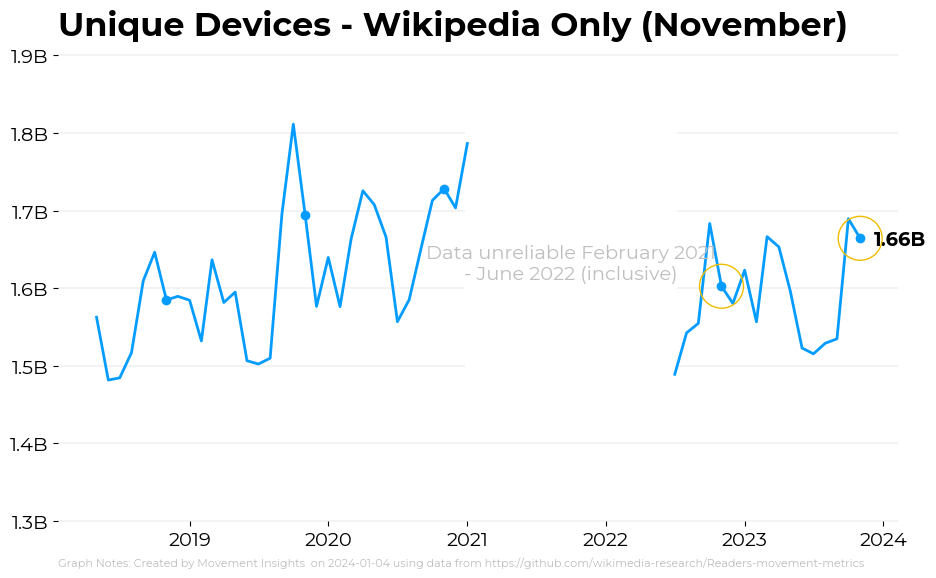

In [1]:
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Rectangle
import os
from os.path import dirname
#local
#from wikicharts import Wikichart, wmf_colors, parameters
#jupyter notebook
%run wikicharts.ipynb

def main():
    print("Generating Unique Devices chart...")
    print("Formatting may look incorrect in jupyter notebook window but the saved chart image will still be correct.")

    #---PARAMETERS---
    save_file_name = "Unique_Devices.png"
    #note for labeling the YoY highlight
    yoy_note = " "
    #display or note
    display_flag = True

    #---CLEAN DATA--
    df = pd.read_csv(readers_data_path, sep='\t')

    start_date = "2018-05-01"
    end_date = datetime.today()
    #convert string to datetime
    df['month'] = pd.to_datetime(df['month'])
    #truncate to preferred date range
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]
    #get last availablemonth, and use to set custom month_interest in the monthlyscatter line
    month_interest = df.iloc[-1]['month'].month
    #drop unneeded columns
    df = df.drop(columns=['automated_pageviews','desktop','interactions','mobileweb','previews_seen','total_pageview'])
    #drop rows w data error
    df_a = df[df["month"].isin(pd.date_range(start_date, "2021-01-01"))]
    df_b = df[df["month"].isin(pd.date_range("2022-07-01", end_date))]
    #monthly higlight
    monthly_df_a = df_a[df_a['month'].dt.month == month_interest]
    monthly_df_b = df_b[df_b['month'].dt.month == month_interest]
    monthly_df = pd.concat([monthly_df_a,monthly_df_b])
    #subset to highlight the last two months
    yoy_highlight = pd.concat([monthly_df.iloc[-2,:],monthly_df.iloc[-1,:]],axis=1).T

    #---MAKE CHART---
    chart = Wikichart(start_date,end_date,df)
    chart.init_plot(width=12)
    #plot data, because of the break in the dataset, we don't use the wikichart class functions
    plt.plot(df_a.month, df_a.unique_devices,
        label='_nolegend_',
        color=wmf_colors['brightblue'],
        linewidth = 2,
        zorder=6)
    plt.plot(df_b.month, df_b.unique_devices,
        label='_nolegend_',
        color=wmf_colors['brightblue'],
        linewidth = 2,
        zorder=6)
    #draw circle on highlighted month by plotting scatter
    plt.scatter(monthly_df.month, monthly_df.unique_devices,
        label='_nolegend_',
        color=wmf_colors['brightblue'],
        zorder=7)
    highlight_radius = 1000000
    plt.scatter(yoy_highlight.month, yoy_highlight.unique_devices,
        label='_nolegend_',
        s=(highlight_radius**0.5),
        facecolors='none',
        edgecolors=wmf_colors['yellow'],
        zorder=8)
    #draw error area
    block_off_start = datetime.strptime("2021-01-01", '%Y-%m-%d')
    block_off_end = datetime.strptime("2022-07-01", '%Y-%m-%d')
    chart.block_off(block_off_start, block_off_end, rectangle_text="Data unreliable February 2021 - June 2022 (inclusive)")
    chart.format(title = f'Unique Devices - Wikipedia Only',
        radjust=0.8,
        data_source="https://github.com/wikimedia-research/Readers-movement-metrics")
    chart.annotate(x='month',
        y='unique_devices',
        num_annotation=chart.calc_finalcount(y='unique_devices',yoy_note=yoy_note))
    chart.finalize_plot(save_file_name,display=display_flag)

if __name__ == "__main__":
    main()